<a href="https://colab.research.google.com/github/ColvinKopram/CTPDataScienceProj/blob/google_colab_data_manip/CTP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install gdown
import gdown, pandas as pd, os
import numpy as np

In [ ]:
file_id = "1xTbrDKHhr--1Ac41ryLD5FtR3773Mbzi"
url = f"https://drive.google.com/uc?id={file_id}"

In [ ]:
out = gdown.download(url, quiet=False)   # returns the downloaded file name

Downloading...
From (original): https://drive.google.com/uc?id=1xTbrDKHhr--1Ac41ryLD5FtR3773Mbzi
From (redirected): https://drive.google.com/uc?id=1xTbrDKHhr--1Ac41ryLD5FtR3773Mbzi&confirm=t&uuid=1883c352-0e03-48ee-96a2-962225f18c11
To: /content/NYPD_Calls_for_Service__Year_to_Date__20251010.csv
100%|██████████| 869M/869M [00:14<00:00, 62.0MB/s]


In [ ]:
fname = out  # use the downloaded name
try:
    df = pd.read_csv(fname, low_memory=False)
except Exception as e:
    # If it is a gzip or has bad lines, try these fallbacks
    try:
        df = pd.read_csv(fname, compression="infer", low_memory=False, on_bad_lines="skip", engine="python")
    except Exception as e2:
        raise e2


In [ ]:
df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,108642792,01/01/2025,12/31/2024,23:22:32,116.0,(null),(null),1056625,180527,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,01/01/2025 12:44:37 AM,01/01/2025 12:45:19 AM,01/01/2025 01:21:05 AM,01/01/2025 01:21:07 AM,40.661894,-73.739133
1,108643213,01/01/2025,12/31/2024,23:58:23,52.0,BRONX,PATROL BORO BRONX,1013953,255677,54I2,AMBULANCE CASE: INJURY/OUTSIDE,Non CIP,01/01/2025 12:17:38 AM,01/01/2025 12:19:56 AM,01/01/2025 12:20:50 AM,01/01/2025 12:39:14 AM,40.868407,-73.892608
2,108643225,01/01/2025,01/01/2025,00:00:08,84.0,BROOKLYN,PATROL BORO BKLYN NORTH,987351,193828,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,01/01/2025 12:00:08 AM,01/01/2025 12:00:08 AM,01/01/2025 12:00:08 AM,01/01/2025 12:42:04 AM,40.698698,-73.988818
3,108643226,01/01/2025,01/01/2025,00:00:43,70.0,BROOKLYN,PATROL BORO BKLYN SOUTH,993152,168419,50G2,DISORDERLY: GROUP/OUTSIDE,Non CIP,01/01/2025 12:00:44 AM,01/01/2025 12:38:50 AM,01/01/2025 01:35:33 AM,01/01/2025 02:06:57 AM,40.628952,-73.967931
4,108643227,01/01/2025,01/01/2025,00:00:49,13.0,MANHATTAN,PATROL BORO MAN SOUTH,987653,210944,10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,01/01/2025 12:00:49 AM,01/01/2025 12:13:25 AM,NaN,01/01/2025 12:19:14 AM,40.745677,-73.987720


In [ ]:
df.shape

(3527523, 18)

In [ ]:
df["BORO_NM"].value_counts()

,count
BORO_NM,
BROOKLYN,1100762
MANHATTAN,924990
BRONX,690842
QUEENS,635948
STATEN ISLAND,151626
(null),23355


In [ ]:
# Columns to remove
drop_cols = ["ADD_TS", "DISP_TS", "ARRIVD_TS", "CLOSNG_TS"]

# Drop only if they exist
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# sanity check
print("Cleaned shape:", df.shape)
set(drop_cols).intersection(df.columns)

Cleaned shape: (3527523, 14)


set()

In [ ]:
# formatting
obj_cols = df.select_dtypes(include="object").columns.tolist()
null_tokens = {"", " ", "(null)", "null", "NULL", "Null"}

for c in obj_cols:
    # trim whitespace
    df[c] = df[c].str.strip()
    # turn empty or null-like strings into NaN
    df[c] = df[c].where(~df[c].isin(null_tokens), np.nan)

print("Done with Step 1")
print("Object columns cleaned:", obj_cols)
print("\nNulls after cleanup (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("\nShape:", df.shape)
df.head()


Done with Step 1
Object columns cleaned: ['CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME', 'BORO_NM', 'PATRL_BORO_NM', 'RADIO_CODE', 'TYP_DESC', 'CIP_JOBS']

Nulls after cleanup (top 10):
BORO_NM          23355
PATRL_BORO_NM    23355
NYPD_PCT_CD          3
CREATE_DATE          0
INCIDENT_TIME        0
CAD_EVNT_ID          0
INCIDENT_DATE        0
GEO_CD_X             0
GEO_CD_Y             0
RADIO_CODE           0
dtype: int64

Shape: (3527523, 14)


,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,Latitude,Longitude
0,108642792,01/01/2025,12/31/2024,23:22:32,116.0,NaN,NaN,1056625,180527,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,40.661894,-73.739133
1,108643213,01/01/2025,12/31/2024,23:58:23,52.0,BRONX,PATROL BORO BRONX,1013953,255677,54I2,AMBULANCE CASE: INJURY/OUTSIDE,Non CIP,40.868407,-73.892608
2,108643225,01/01/2025,01/01/2025,00:00:08,84.0,BROOKLYN,PATROL BORO BKLYN NORTH,987351,193828,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,40.698698,-73.988818
3,108643226,01/01/2025,01/01/2025,00:00:43,70.0,BROOKLYN,PATROL BORO BKLYN SOUTH,993152,168419,50G2,DISORDERLY: GROUP/OUTSIDE,Non CIP,40.628952,-73.967931
4,108643227,01/01/2025,01/01/2025,00:00:49,13.0,MANHATTAN,PATROL BORO MAN SOUTH,987653,210944,10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,40.745677,-73.987720


In [ ]:
df.isna().sum().sort_values(ascending=False).head(10)

,0
BORO_NM,23355
PATRL_BORO_NM,23355
NYPD_PCT_CD,3
CREATE_DATE,0
INCIDENT_TIME,0
CAD_EVNT_ID,0
INCIDENT_DATE,0
GEO_CD_X,0
GEO_CD_Y,0
RADIO_CODE,0


In [ ]:
# Drop any row with at least one null
before = len(df)
df = df.dropna(how="any")
after = len(df)

print("Rows before:", before)
print("Rows after :", after)
print("Rows removed:", before - after)

# Quick check
df.isna().sum()


Rows before: 3527523
Rows after : 3504168
Rows removed: 23355


,0
CAD_EVNT_ID,0
CREATE_DATE,0
INCIDENT_DATE,0
INCIDENT_TIME,0
NYPD_PCT_CD,0
BORO_NM,0
PATRL_BORO_NM,0
GEO_CD_X,0
GEO_CD_Y,0
RADIO_CODE,0


In [ ]:
df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,Latitude,Longitude
1,108643213,01/01/2025,12/31/2024,23:58:23,52.0,BRONX,PATROL BORO BRONX,1013953,255677,54I2,AMBULANCE CASE: INJURY/OUTSIDE,Non CIP,40.868407,-73.892608
2,108643225,01/01/2025,01/01/2025,00:00:08,84.0,BROOKLYN,PATROL BORO BKLYN NORTH,987351,193828,75S,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,Non CIP,40.698698,-73.988818
3,108643226,01/01/2025,01/01/2025,00:00:43,70.0,BROOKLYN,PATROL BORO BKLYN SOUTH,993152,168419,50G2,DISORDERLY: GROUP/OUTSIDE,Non CIP,40.628952,-73.967931
4,108643227,01/01/2025,01/01/2025,00:00:49,13.0,MANHATTAN,PATROL BORO MAN SOUTH,987653,210944,10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,40.745677,-73.987720
5,108643230,01/01/2025,01/01/2025,00:01:43,84.0,BROOKLYN,PATROL BORO BKLYN NORTH,987649,191484,75O,TRAIN ORDER MAINTENANCE SWEEP (TOMS),Non CIP,40.692264,-73.987745


In [ ]:
df["BORO_NM"].value_counts()

,count
BORO_NM,
BROOKLYN,1100762
MANHATTAN,924990
BRONX,690842
QUEENS,635948
STATEN ISLAND,151626


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

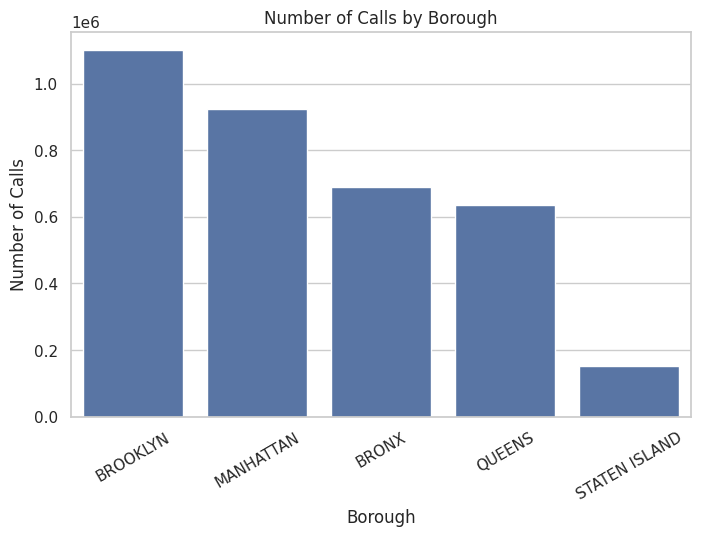

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="BORO_NM", order=df["BORO_NM"].value_counts().index)
plt.title("Number of Calls by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Calls")
plt.xticks(rotation=30)
plt.show()


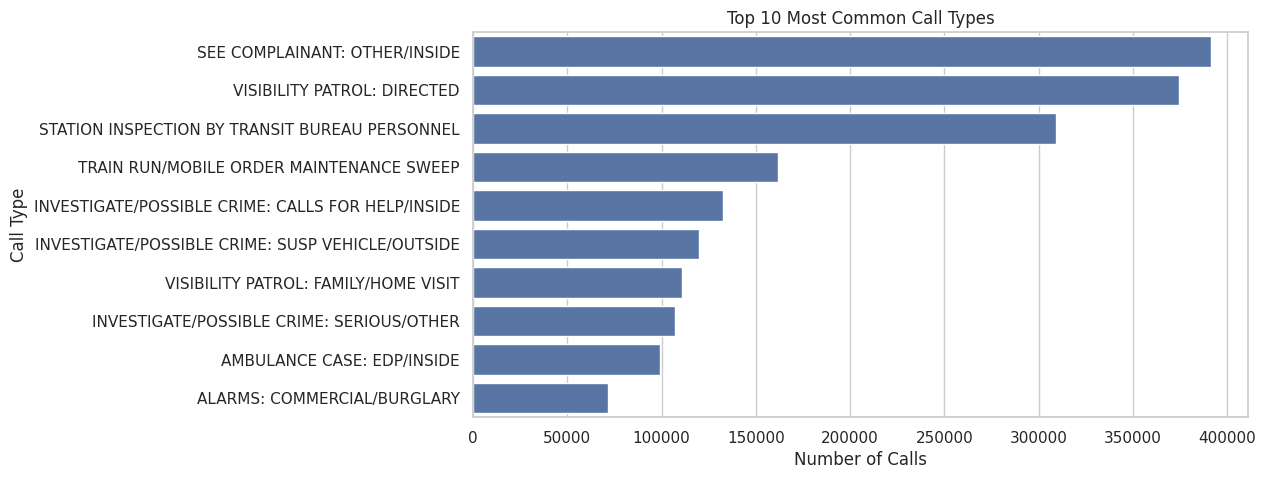

In [ ]:
plt.figure(figsize=(10,5))
top_types = df["TYP_DESC"].value_counts().head(10)
sns.barplot(x=top_types.values, y=top_types.index)
plt.title("Top 10 Most Common Call Types")
plt.xlabel("Number of Calls")
plt.ylabel("Call Type")
plt.show()


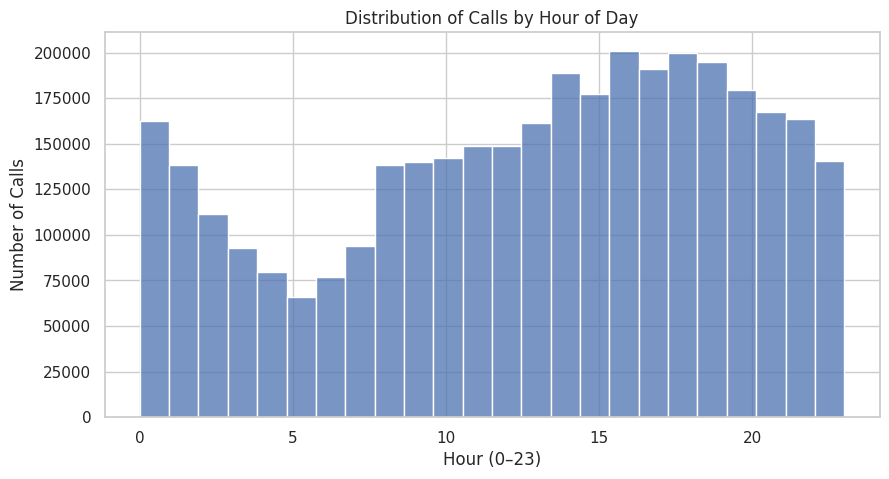

In [ ]:
# make sure time is formatted correctly
df["HOUR"] = pd.to_datetime(df["INCIDENT_TIME"], format="%H:%M:%S", errors="coerce").dt.hour

plt.figure(figsize=(10,5))
sns.histplot(df["HOUR"].dropna(), bins=24, kde=False)
plt.title("Distribution of Calls by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Calls")
plt.show()


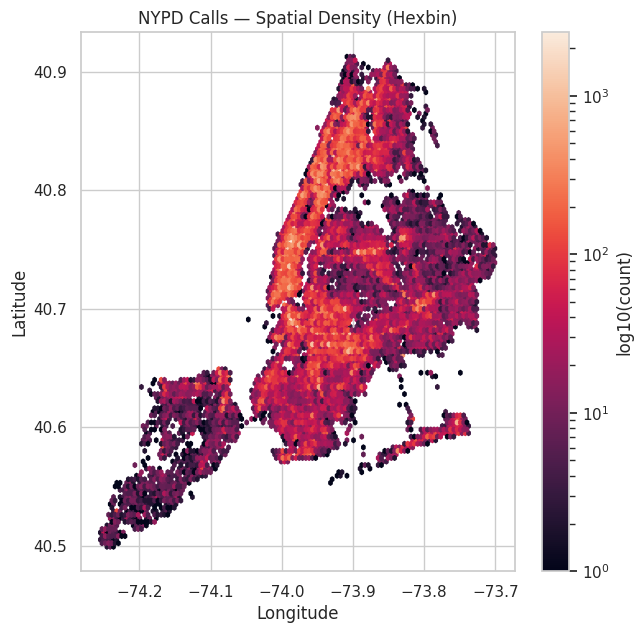

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Keep valid NYC coordinates
coords = df.dropna(subset=["Latitude", "Longitude"]).copy()
coords = coords[
    (coords["Latitude"].between(40.3, 41.2)) &
    (coords["Longitude"].between(-74.5, -73.3))
]

# downsample for speed if very large
N = 300_000
if len(coords) > N:
    coords = coords.sample(N, random_state=42)

# Hexbin density plot
plt.figure(figsize=(7,7))
hb = plt.hexbin(
    coords["Longitude"].values,
    coords["Latitude"].values,
    gridsize=120,
    bins="log"   # color = log10(count)
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("NYPD Calls — Spatial Density (Hexbin)")
cb = plt.colorbar(hb)
cb.set_label("log10(count)")
plt.show()



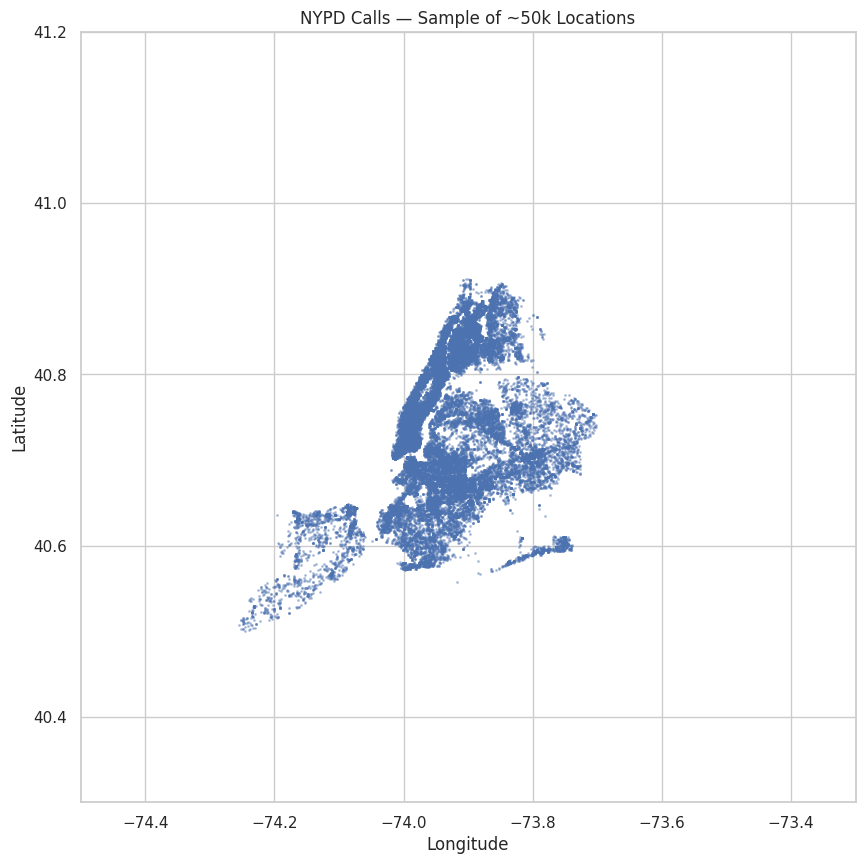

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Keep valid NYC coordinates
df_map = df.dropna(subset=["Latitude", "Longitude"]).copy()
df_map = df_map[
    (df_map["Latitude"].between(40.3, 41.2)) &
    (df_map["Longitude"].between(-74.5, -73.3))
]

# 2) Sample ~50k points
N = 50_000
if len(df_map) > N:
    df_sample = df_map.sample(N, random_state=42)
else:
    df_sample = df_map

# 3) Plot bigger
plt.figure(figsize=(10,10))
plt.scatter(
    df_sample["Longitude"].values,
    df_sample["Latitude"].values,
    s=1.2,
    alpha=0.35
)
plt.title("NYPD Calls — Sample of ~50k Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-74.5, -73.3)
plt.ylim(40.3, 41.2)
plt.show()


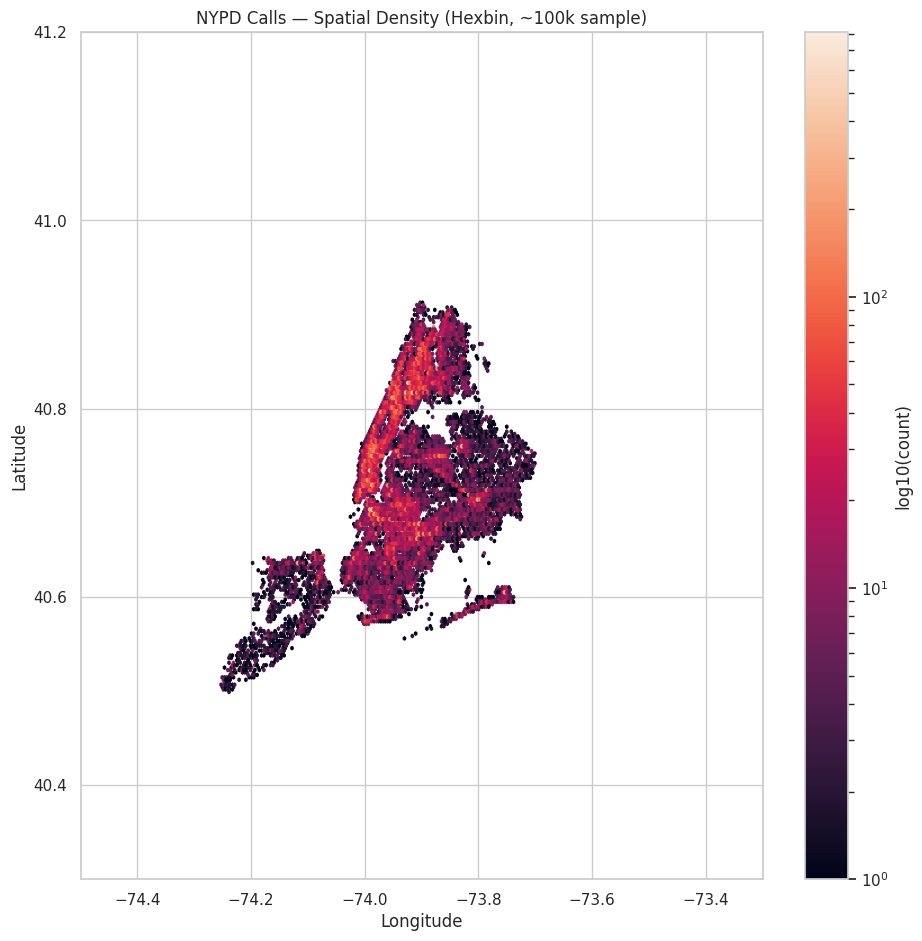

In [ ]:


# 1) Same filter
df_map = df.dropna(subset=["Latitude", "Longitude"]).copy()
df_map = df_map[
    (df_map["Latitude"].between(40.3, 41.2)) &
    (df_map["Longitude"].between(-74.5, -73.3))
]

# 2) Sample ~100k for a smoother heat feel
N = 100_000
if len(df_map) > N:
    df_sample = df_map.sample(N, random_state=42)
else:
    df_sample = df_map

# 3) Hexbin with a larger figure
plt.figure(figsize=(11,11))
hb = plt.hexbin(
    df_sample["Longitude"].values,
    df_sample["Latitude"].values,
    gridsize=140,
    bins="log"
)
plt.title("NYPD Calls — Spatial Density (Hexbin, ~100k sample)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-74.5, -73.3)
plt.ylim(40.3, 41.2)
cb = plt.colorbar(hb)
cb.set_label("log10(count)")
plt.show()


In [ ]:

import seaborn as sns


# Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Keep valid NYC coordinates
base = df.dropna(subset=["Latitude", "Longitude"]).copy()
base = base[
    (base["Latitude"].between(40.3, 41.2)) &
    (base["Longitude"].between(-74.5, -73.3))
]
print("Rows with valid NYC coords:", len(base))


Rows with valid NYC coords: 3504168


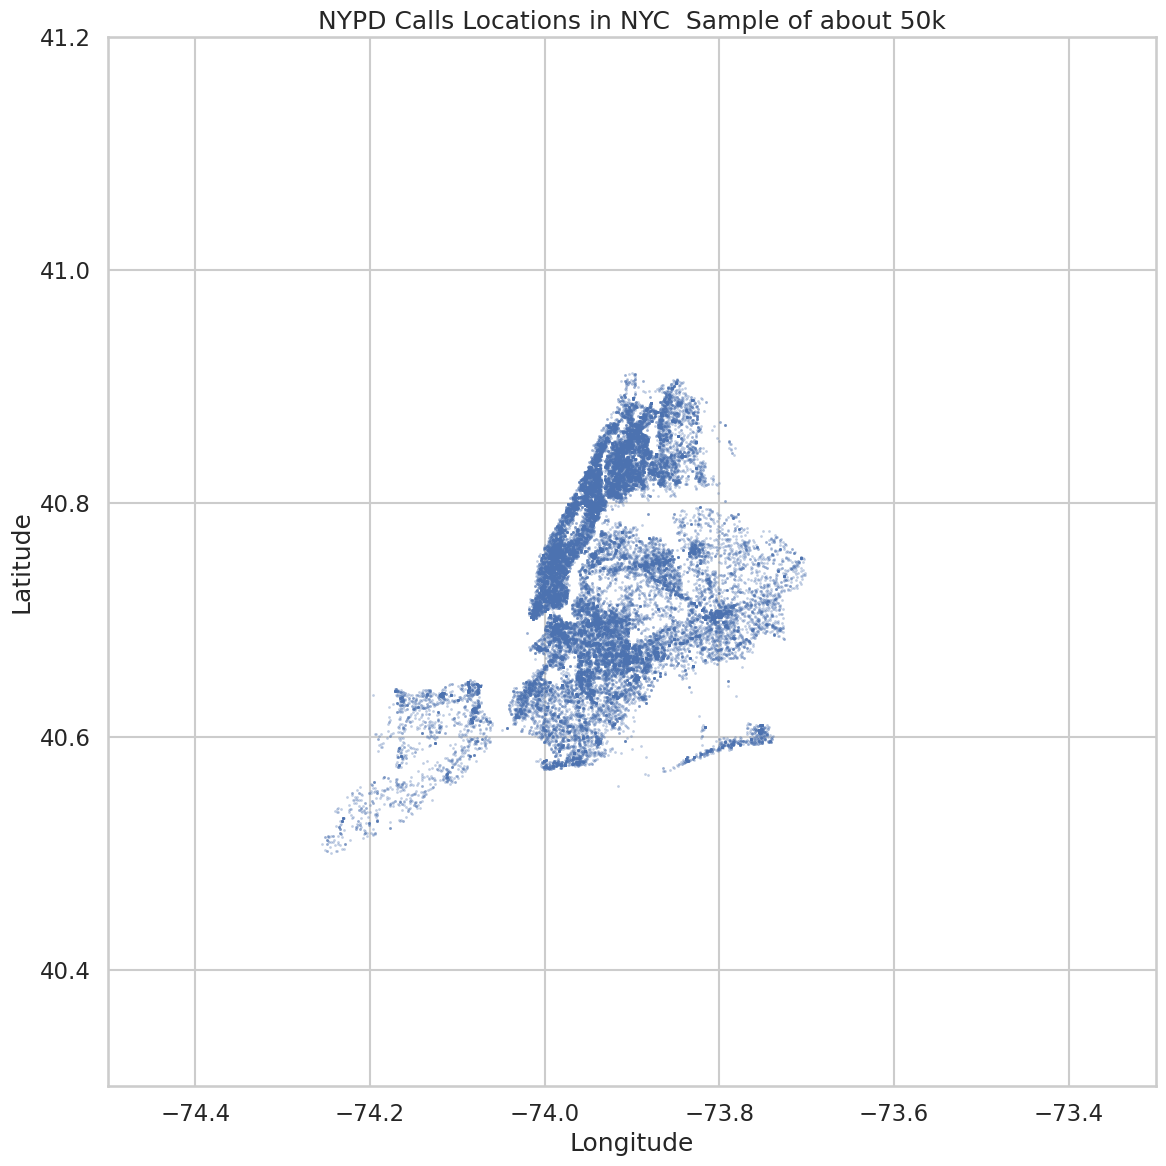

In [ ]:
N = 50_000
plot1 = base.sample(N, random_state=42) if len(base) > N else base

plt.figure(figsize=(12,12))
sns.scatterplot(
    data=plot1,
    x="Longitude", y="Latitude",
    s=3, alpha=0.35, edgecolor=None
)
plt.title("NYPD Calls Locations in NYC  Sample of about 50k")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-74.5, -73.3)
plt.ylim(40.3, 41.2)
plt.tight_layout()
plt.show()
